In [1]:
import sys
import os
import Plotting as plot
sys.path.append(os.getcwd())
from quantileRegression import quantileRegression, setupJoblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
#reload(plt)
plt.style.use('seaborn-talk')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)
import copy as cp



Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
n_jobs=30
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [3]:
# Upload Dataframes:
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5", 0, 2000000)

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5
Selecting events   [ 0 ,  2000000 ]  out of  21216525
number of events: 2000000


In [4]:
print len(qr_mc1.df.query('-1.444 < ScEta & ScEta <1.444'))
print len(qr_mc2.df.query('ScEta < -1.57 | ScEta >1.57  '))

7950285
1591749


In [9]:
qr_mc1.correctAll(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_") 
qr_mc2.correctAll(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_")
print len(qr_mc1.df.index)
print len(qr_mc2.df.index)
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
qr_mc= quantileRegression("mc")
qr_mc.df = data2.sample(n=2000000).reset_index(drop=True)

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5
7951406
1591749


In [25]:
print len(qr_mc.df.query('-1.444 < ScEta & ScEta <1.444'))
print len(qr_mc.df.query('ScEta < -1.57 | ScEta >1.57  '))
print len(qr_data.df.query('-1.444 < ScEta & ScEta <1.444'))
print len(qr_data.df.query('ScEta < -1.57 | ScEta >1.57  '))

1666632
333126
1651472
345927


In [13]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4',"CovarianceIphiIphi"]

mvas = [ ("moriondPhoID",dict(correct=[], rhoSubtraction=True) ), 
         ("moriondPhoIDcorrShowerShapes",dict(correct=showerShapes, rhoSubtraction=True) ) ]# ,
##("moriondPhoIDcorrIso",dict(correct=['PhoIso03'],rhoSubtraction=True)),
#("moriondPhoIDcorrAll",dict(correct=showerShapes+['PhoIso03'], rhoSubtraction=True))]

weights = ("./phoIDMVAweights/HggPhoId_barrel_Moriond2017_wRhoRew.weights.xml","./phoIDMVAweights/HggPhoId_endcap_Moriond2017_wRhoRew.weights.xml")

In [14]:
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )
dfmc = qr_mc.getDF()
dfdata = qr_data.getDF()

Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   37.8s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   39.1s remaining:  9.4min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   39.2s remaining:  4.4min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   39.7s remaining:  2.8min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   40.8s remaining:  2.0min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.2min remaining:  2.5min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.2min remaining:  2.0min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.3min remaining:  1.5min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.3min remaining:  1.2min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.3min remaining:   55.8s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.3min remaining:   42.6s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.3min remaining:   31.7s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 444 ms, sys: 1.43 s, total: 1.87 s
Wall time: 1min 21s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   55.2s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   55.4s remaining: 13.4min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   56.3s remaining:  6.3min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   56.8s remaining:  3.9min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   57.3s remaining:  2.7min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   57.7s remaining:  2.0min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   58.8s remaining:  1.6min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.0min remaining:  1.3min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.1min remaining:  1.0min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.1min remaining:   47.9s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.1min remaining:   36.6s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.1min remaining:   27.3s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrShowerShapes, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'CovarianceIphiIphi']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   50.4s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   51.5s remaining: 12.4min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   52.5s remaining:  5.9min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   53.8s remaining:  3.7min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   56.8s remaining:  2.7min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   59.1s remaining:  2.1min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   59.9s remaining:  1.6min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.1min remaining:  1.3min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.1min remaining:  1.0min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.1min remaining:   46.7s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.1min remaining:   35.6s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.1min remaining:   26.9s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 1.44 s, sys: 4.09 s, total: 5.53 s
Wall time: 2min 21s


[Parallel(n_jobs=30)]: Done  31 out of  31 | elapsed:  1.2min finished


In [15]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')

Plotting.py:52: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if axes == None: axes = fig.axes


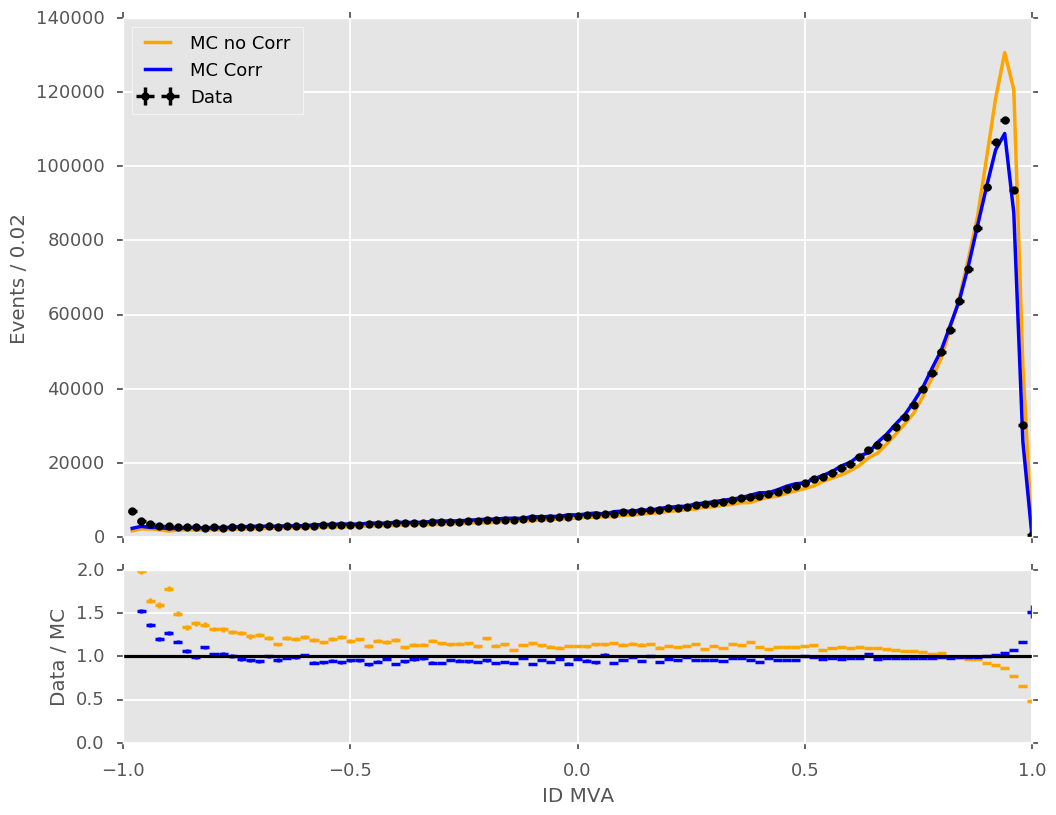

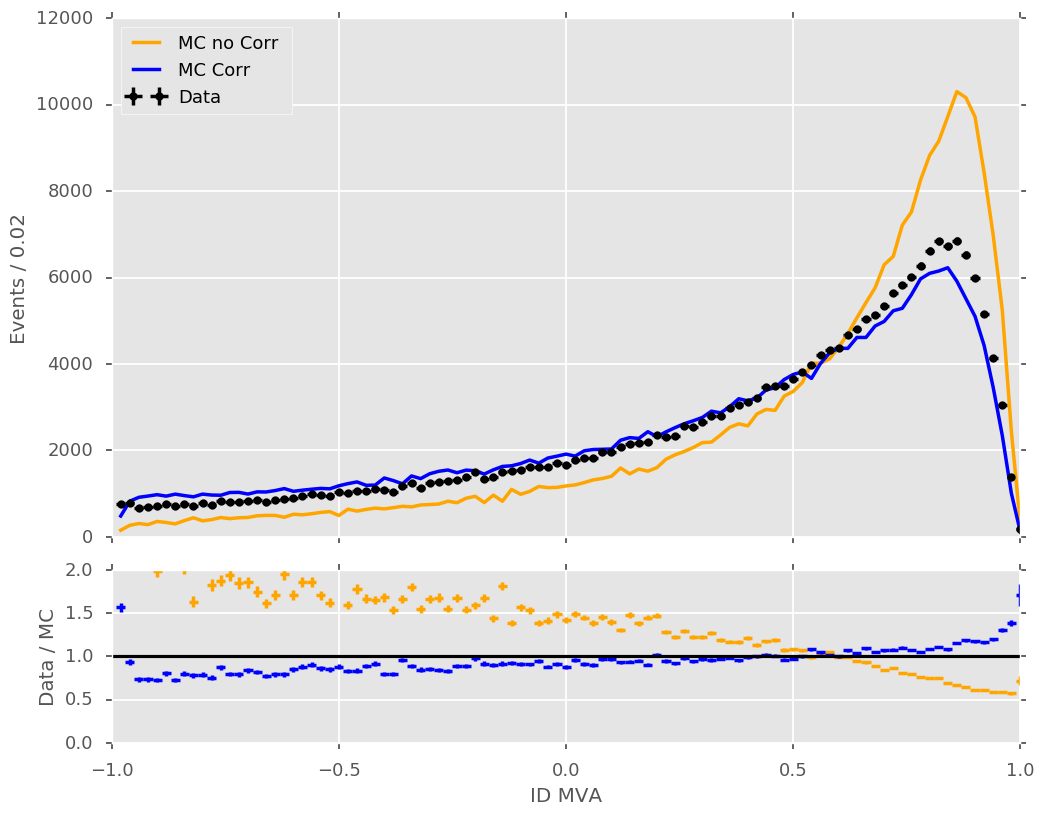

In [16]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrShowerShapes']
mcstyles = [ dict(label='MC no Corr ',color='orange'),
             dict(label='MC Corr ',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
  

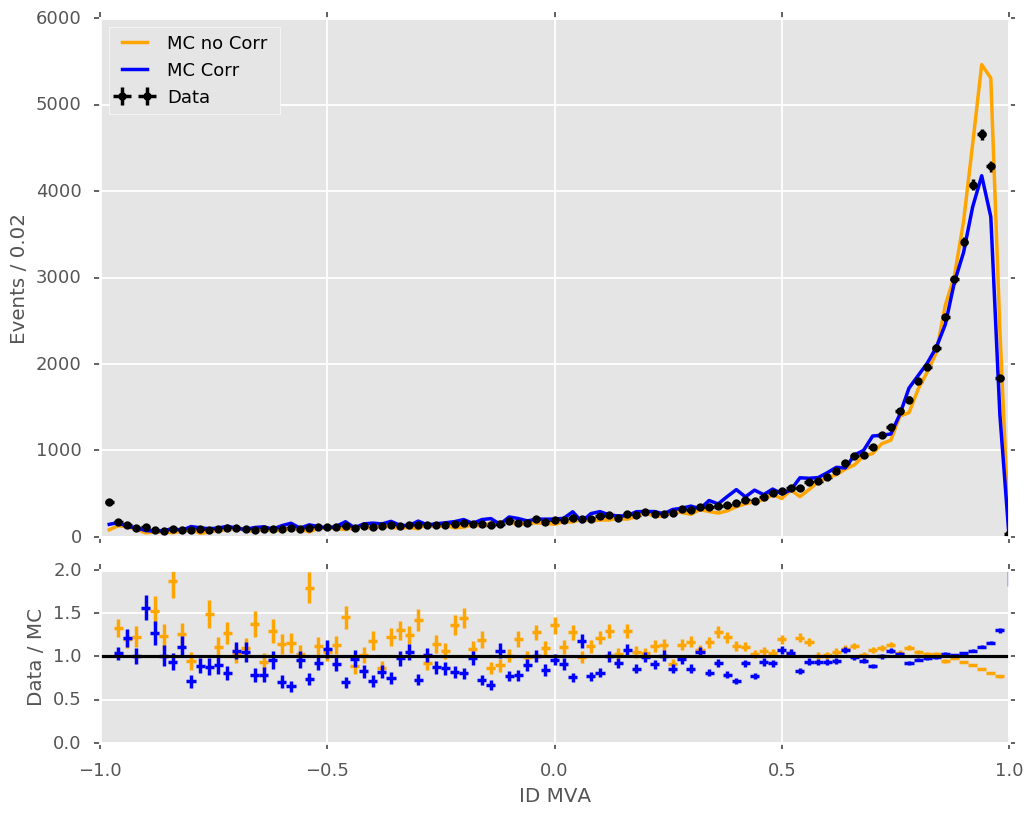

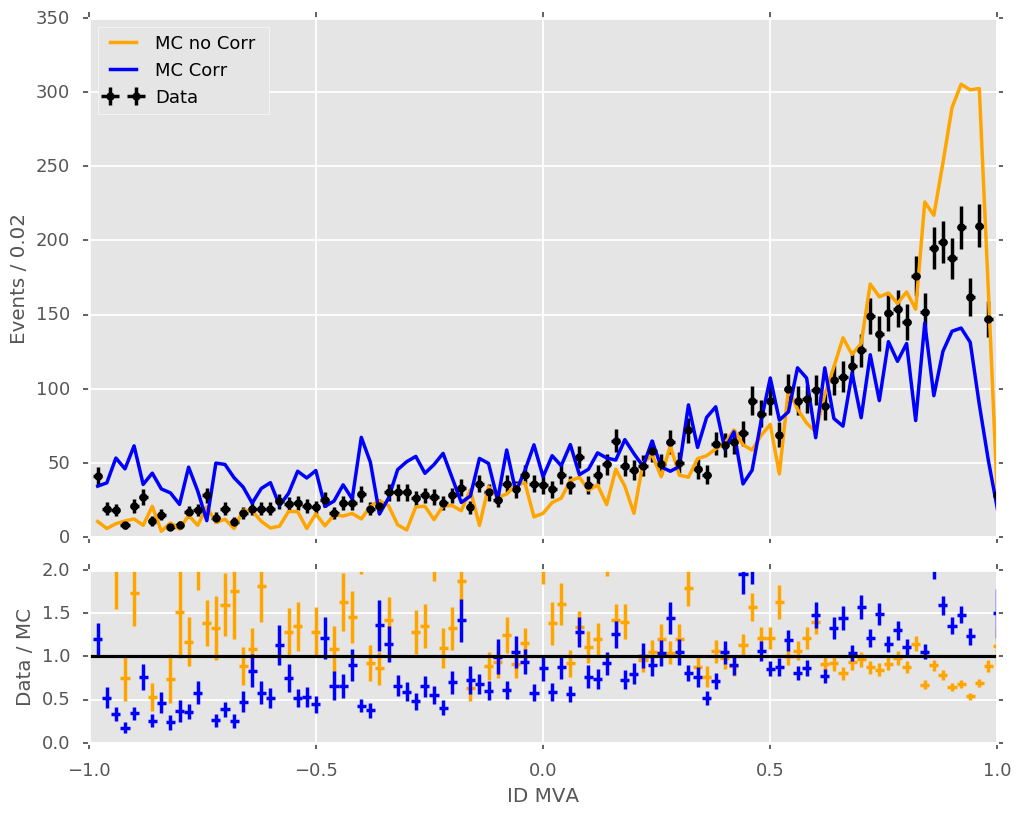

In [29]:
Ptmin=60
Ptmax=80

bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrShowerShapes']
mcstyles = [ dict(label='MC no Corr ',color='orange'),
             dict(label='MC Corr ',color='blue'), 
           ]

for dfs in [ (dfEB.query("Pt>"+str(Ptmin)+"and Pt<"+str(Ptmax)),dfmcEB.query("Pt>"+str(Ptmin)+"and Pt<"+str(Ptmax))), (dfEE.query("Pt>"+str(Ptmin)+"and Pt<"+str(Ptmax)),dfmcEE.query("Pt>"+str(Ptmin)+"and Pt<"+str(Ptmax))) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
  

In [19]:
import matplotlib as mpl
from functools import reduce
mpl.rcParams['figure.figsize'] = (8,8)

mpl.rc('xtick', labelsize=40) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('lines', linewidth=2)
mpl.rc('axes', linewidth=2)

def set_style(obj,color):
    obj.set_color(color)
    obj.set_linewidth(2)
    
def do_boxplot(df,column,by,color,ax):
    objs = df.query('%s > -0.8' % column).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[column].values()))

def do_var_boxplot(df,cut,column,by,color,ax):
    objs = df.query(cut).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[column].values()))

In [20]:
binsEta = np.linspace(-2.5,2.5, 21)

dfmc['etaBin'] = pd.cut(dfmc.ScEta,binsEta)
dfdata['etaBin'] = pd.cut(dfdata.ScEta,binsEta)

binsPt = np.linspace(20,80,21)

dfmc['ptBin'] = pd.cut(dfmc.Pt,binsPt)
dfdata['ptBin'] = pd.cut(dfdata.Pt,binsPt)

dfmcEB['ptBin'] = pd.cut(dfmcEB.Pt,binsPt)
dfEB['ptBin'] = pd.cut(dfEB.Pt,binsPt)

dfmcEE['ptBin'] = pd.cut(dfmcEE.Pt,binsPt)
dfEE['ptBin'] = pd.cut(dfEE.Pt,binsPt)

binsRho = np.linspace(0,25,26)

dfmc['rhoBin'] = pd.cut(dfmc.rho,binsRho)
dfdata['rhoBin'] = pd.cut(dfdata.rho,binsRho)

dfmcEB['rhoBin'] = pd.cut(dfmcEB.rho,binsRho)
dfEB['rhoBin'] = pd.cut(dfEB.rho,binsRho)

dfmcEE['rhoBin'] = pd.cut(dfmcEE.rho,binsRho)
dfEE['rhoBin'] = pd.cut(dfEE.rho,binsRho)



/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

/swshare/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


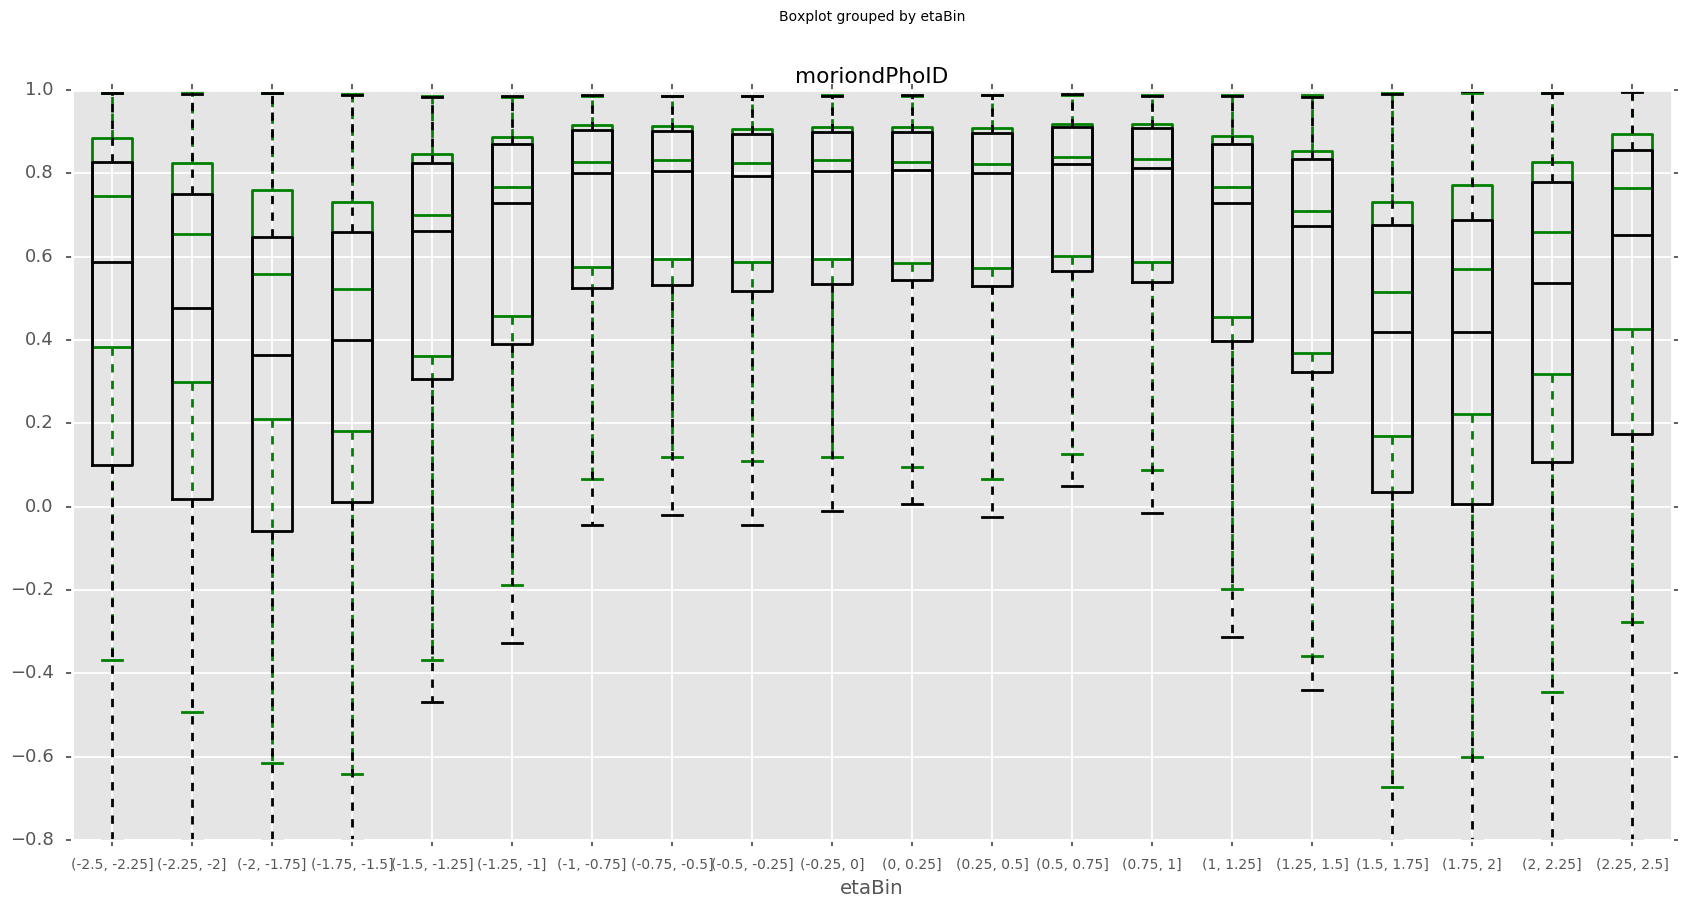

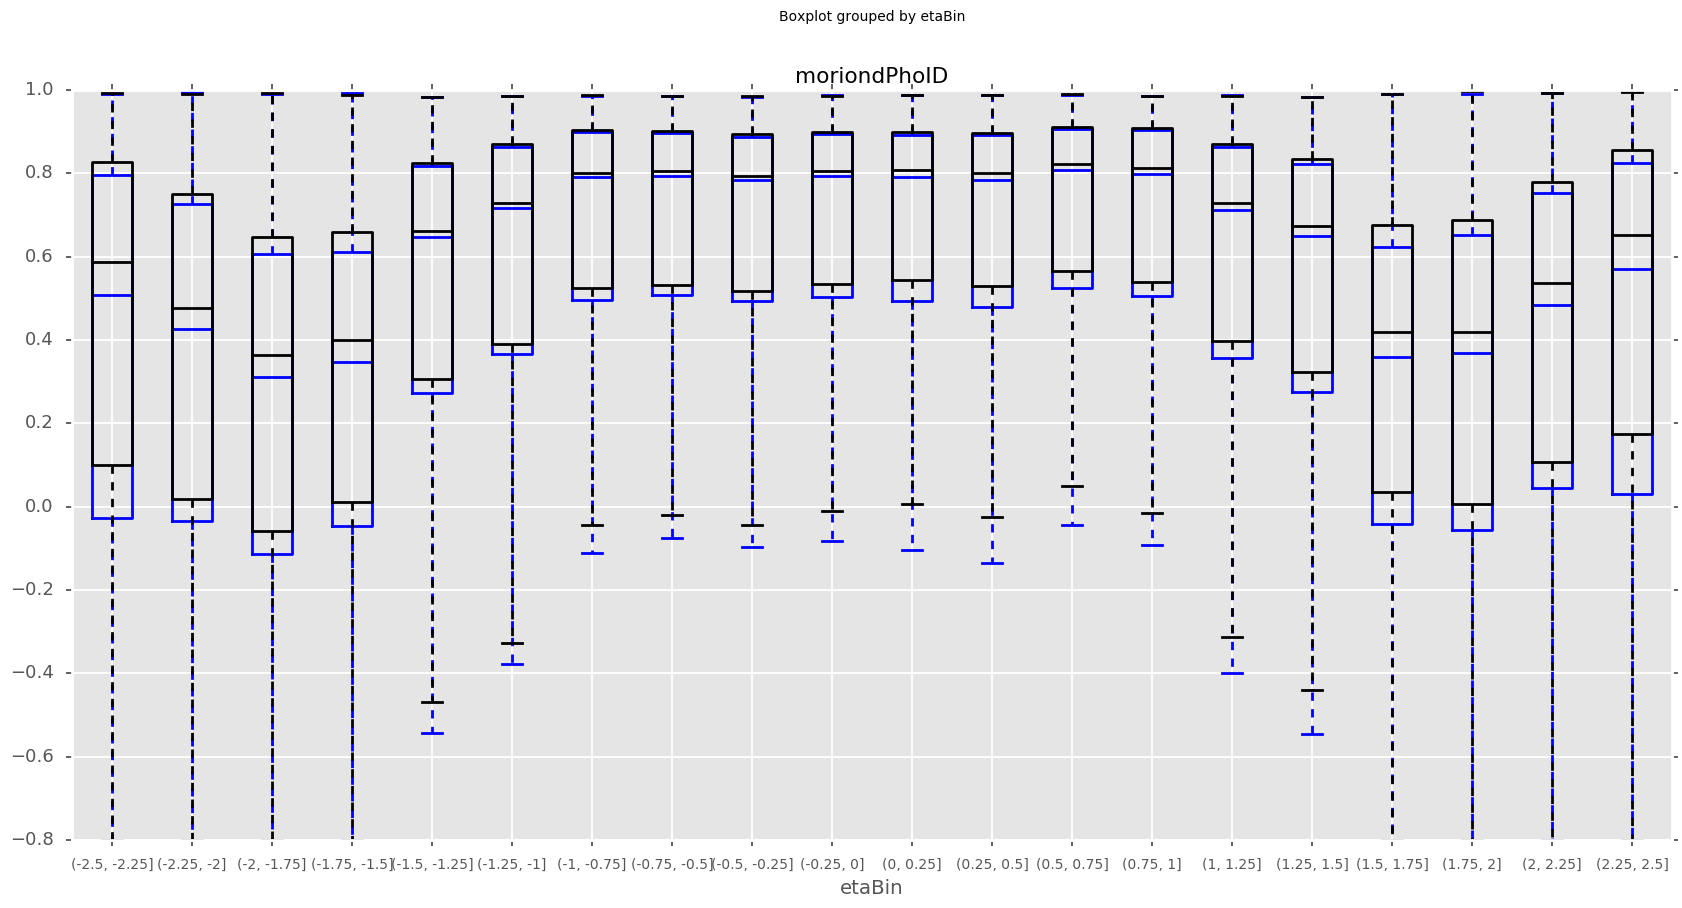

In [21]:
%matplotlib inline
plt.style.use('seaborn-talk')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmc,'moriondPhoID', 'etaBin', 'green', ax)
do_boxplot(dfdata,'moriondPhoID', 'etaBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmc,'moriondPhoIDcorrShowerShapes', 'etaBin', 'blue', ax)
do_boxplot(dfdata,'moriondPhoID', 'etaBin', 'black', ax)

fig.show()

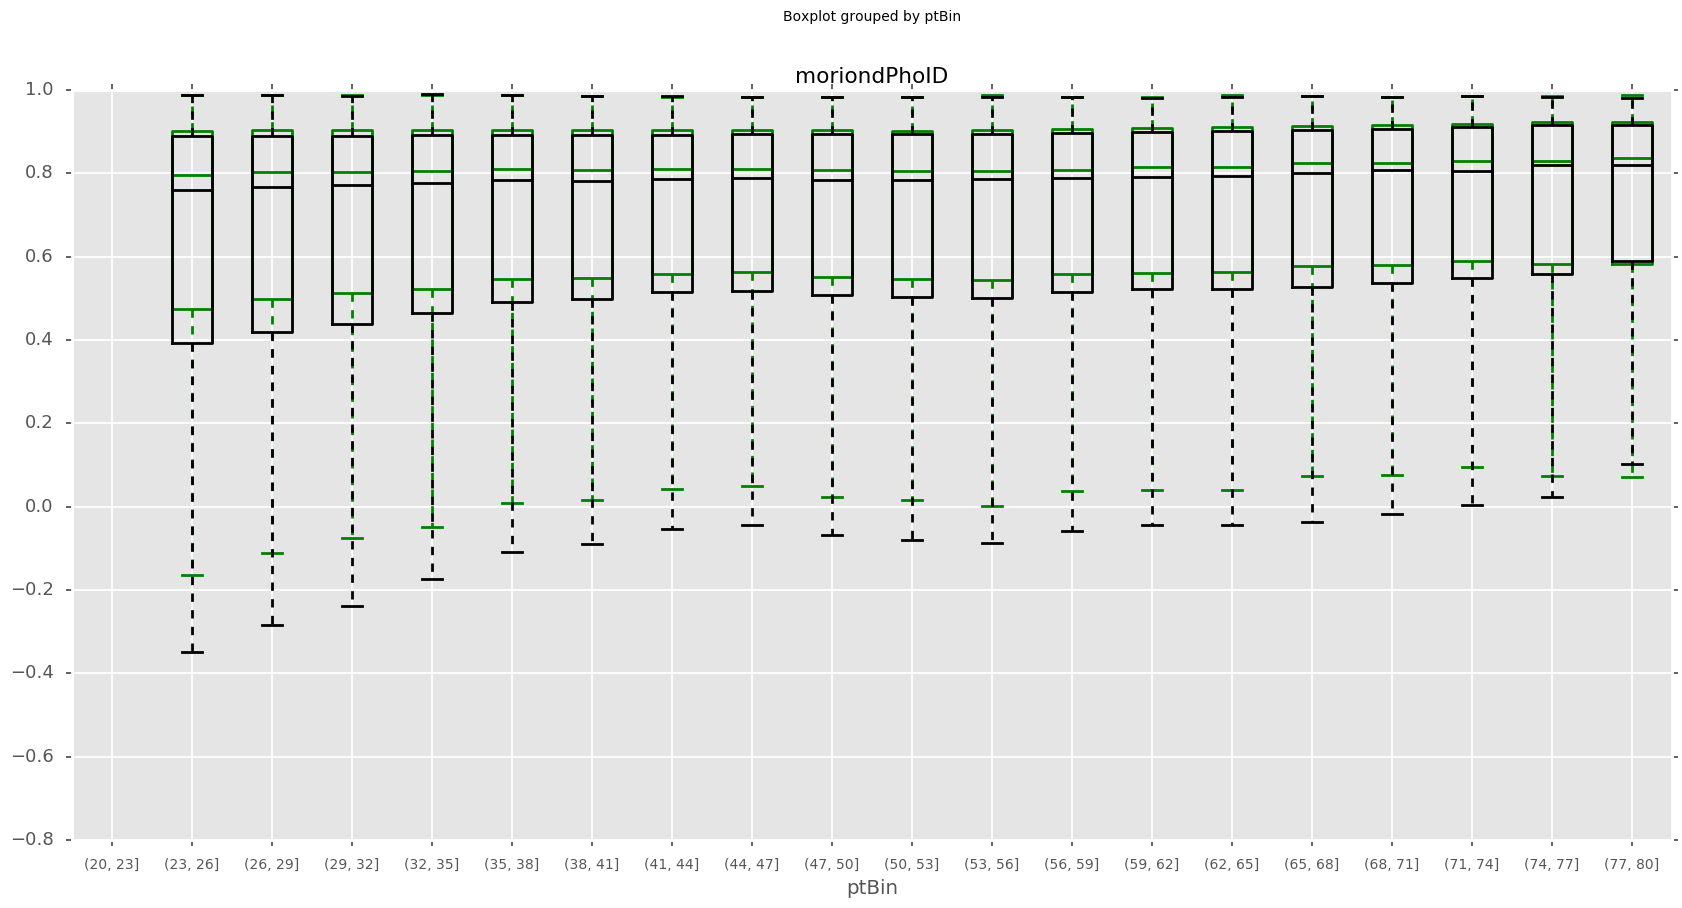

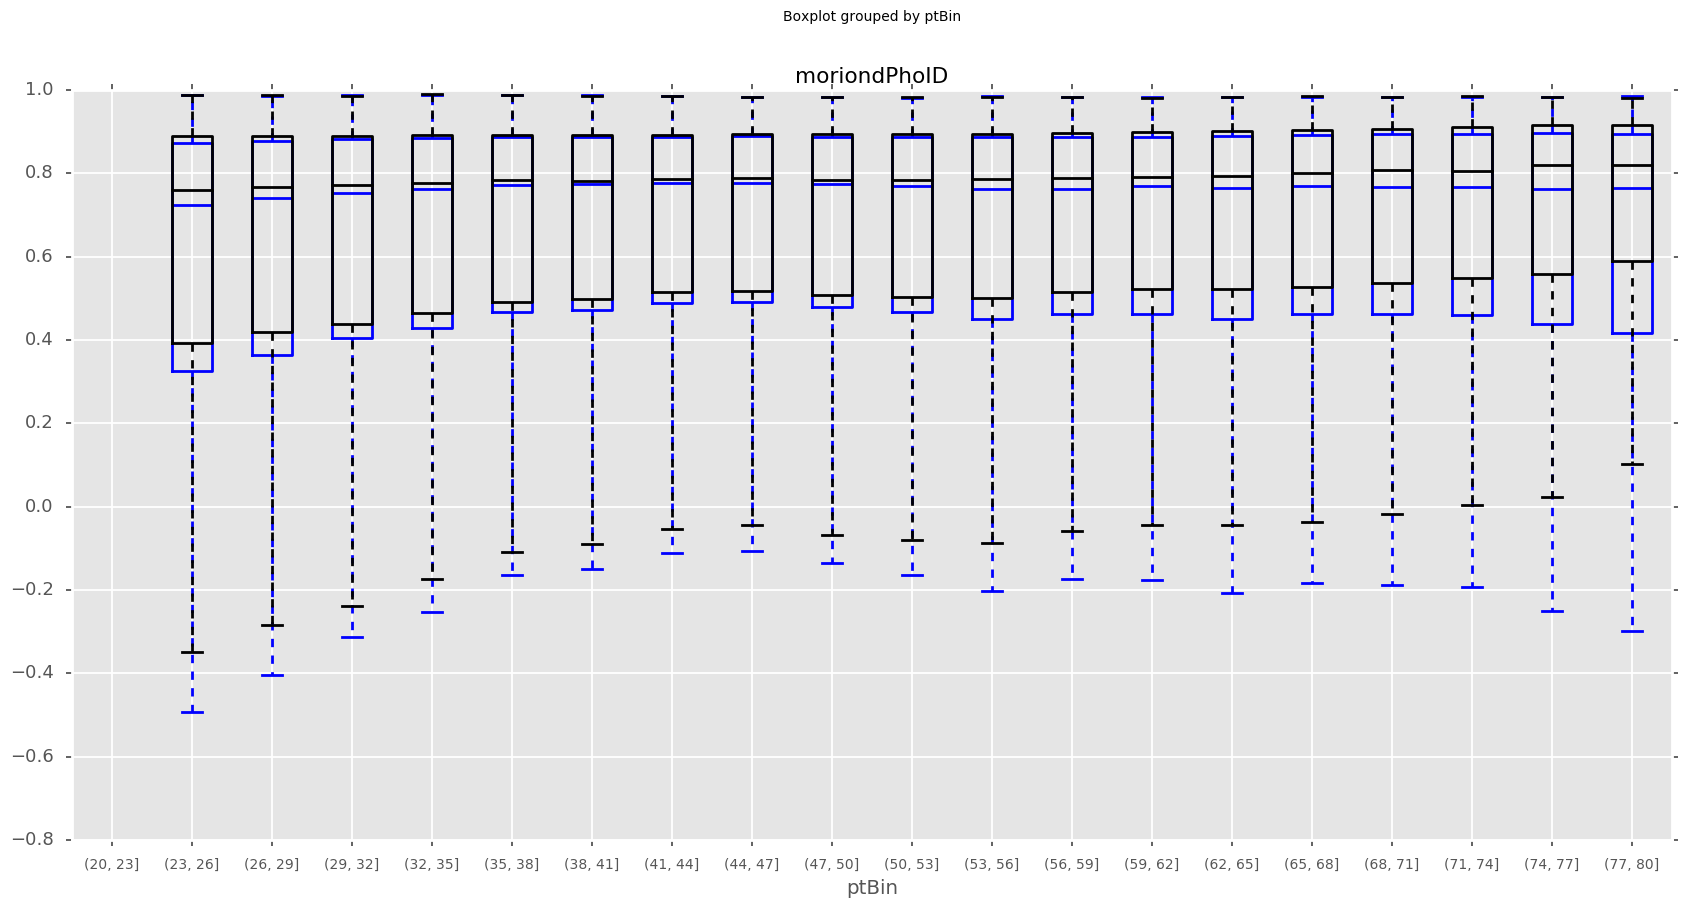

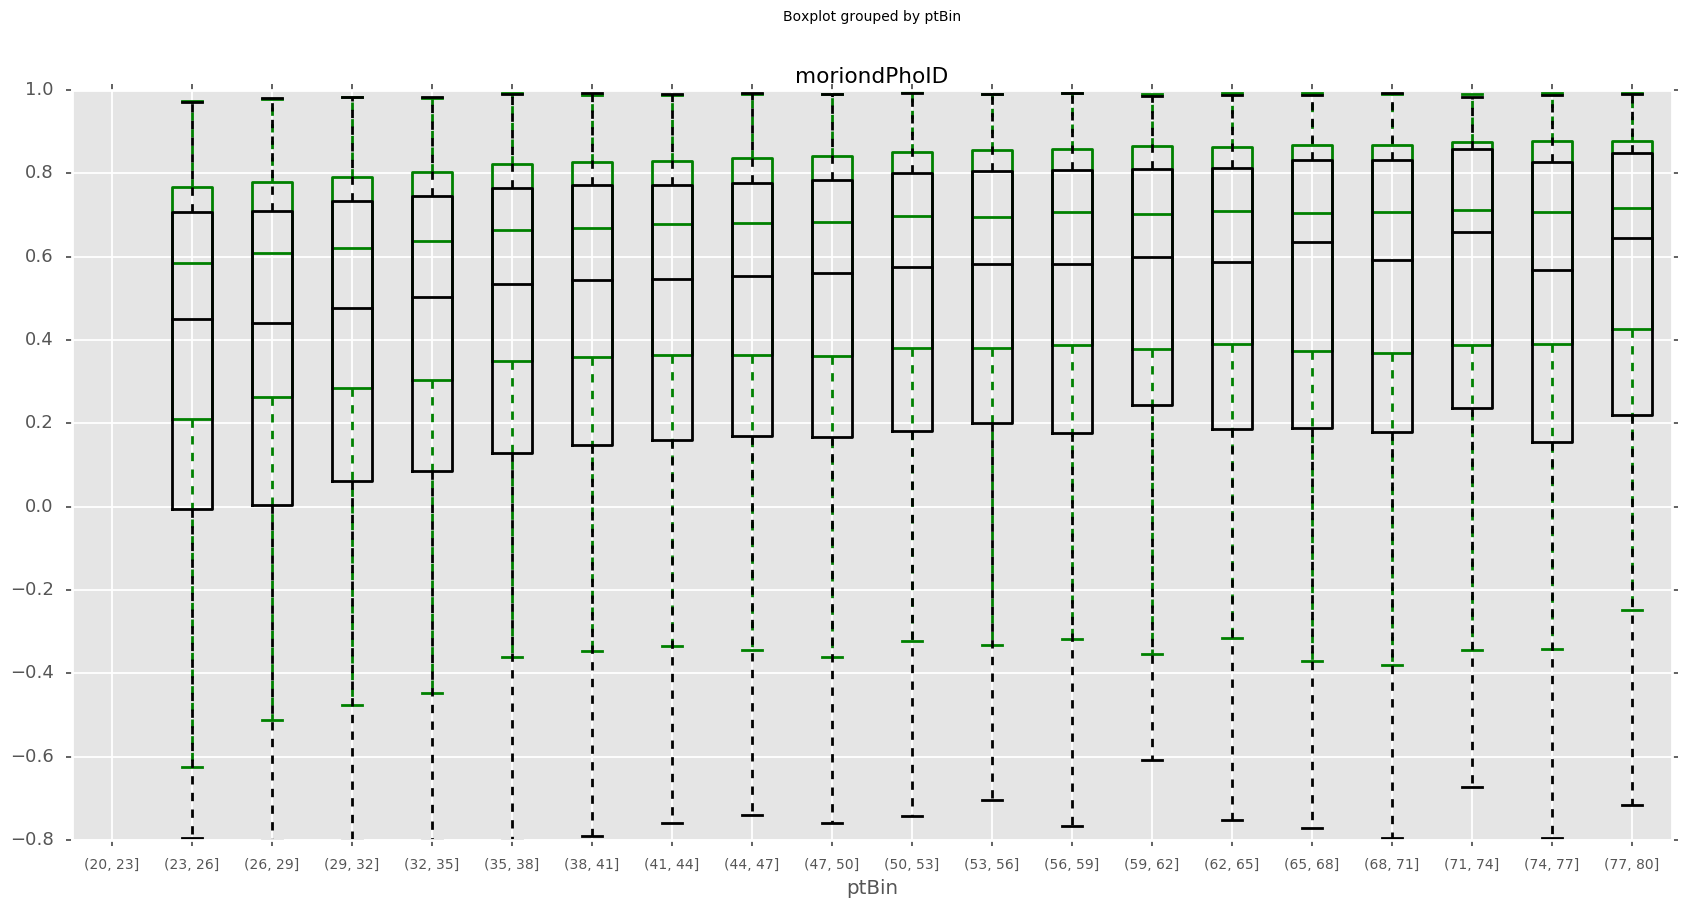

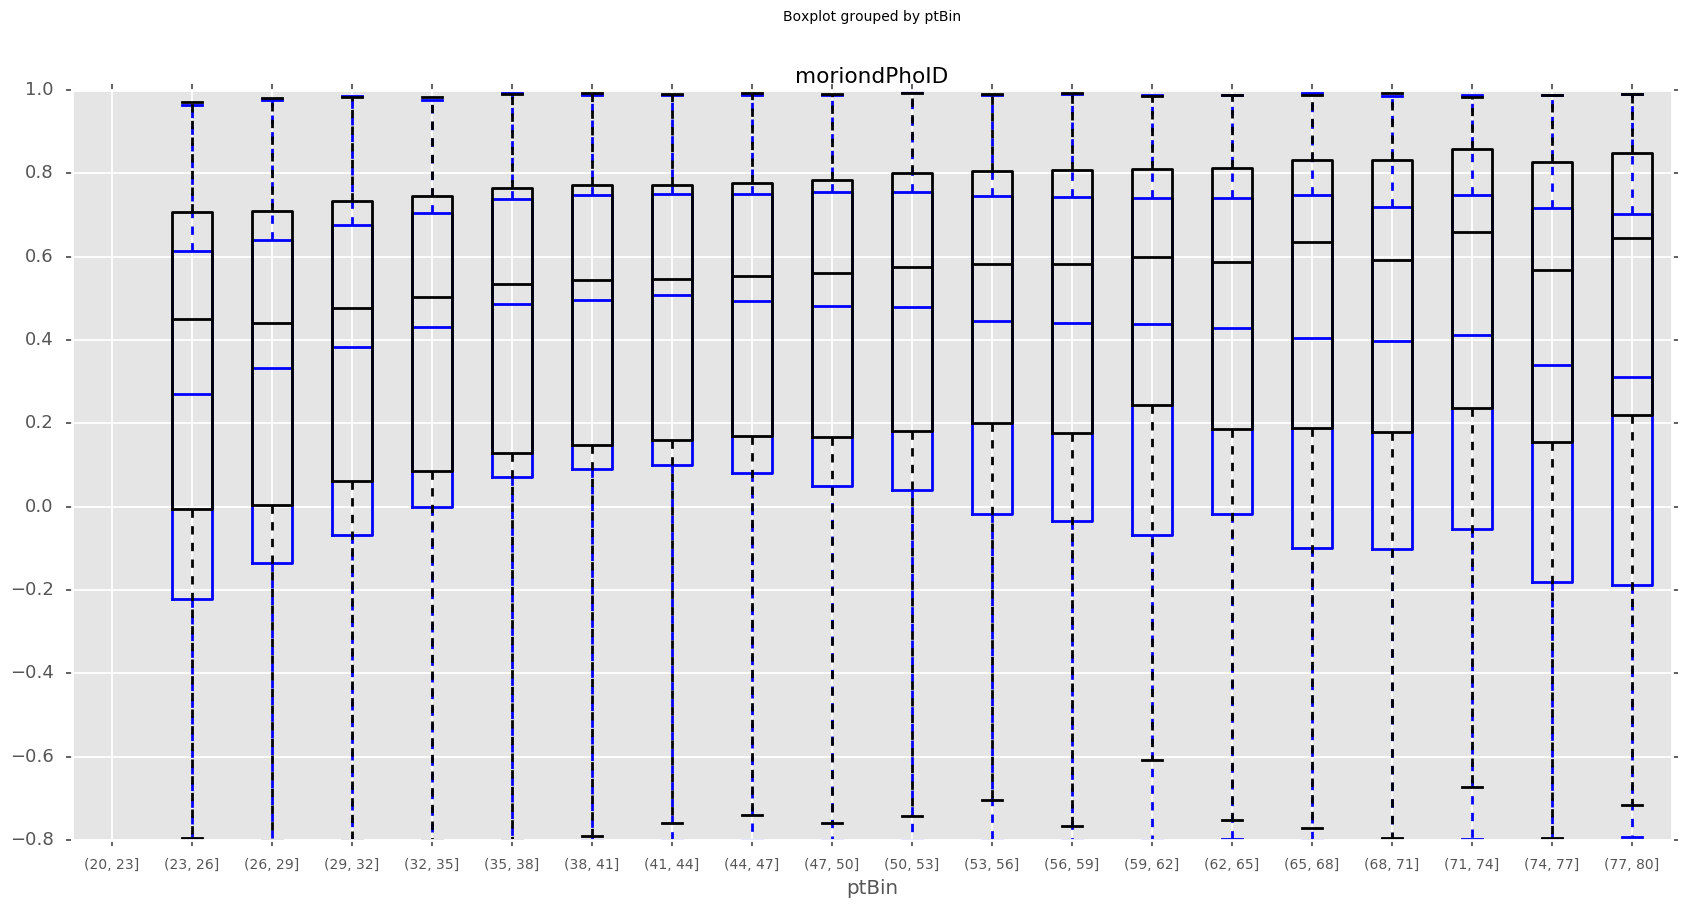

In [22]:


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoID', 'ptBin', 'green', ax)
do_boxplot(dfEB,'moriondPhoID', 'ptBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoIDcorrShowerShapes', 'ptBin', 'blue', ax)
do_boxplot(dfEB,'moriondPhoID', 'ptBin', 'black', ax)


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoID', 'ptBin', 'green', ax)
do_boxplot(dfEE,'moriondPhoID', 'ptBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoIDcorrShowerShapes', 'ptBin', 'blue', ax)
do_boxplot(dfEE,'moriondPhoID', 'ptBin', 'black', ax)

# dfmc.boxplot(column='moriondPhoIDcorr',by='etaBin', return_type='dict', ax=ax, color='blue')

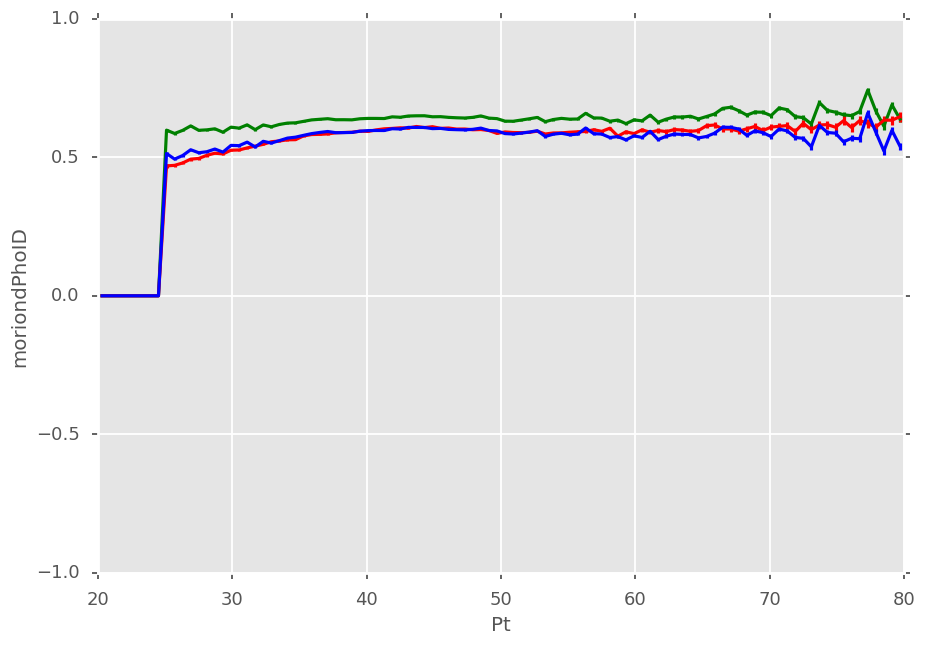

In [23]:
dfm=dfmcEB
dfd=dfEB
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
plot.Profile(dfm[xvar]  , dfm[yvar+'corrShowerShapes']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])

        

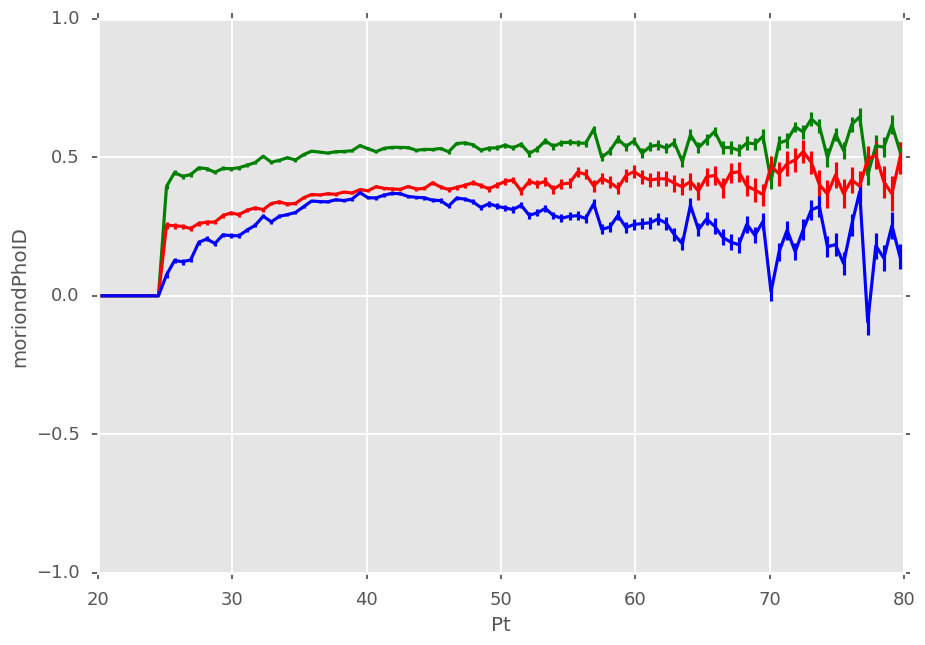

In [24]:
dfm=dfmcEE
dfd=dfEE
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
plot.Profile(dfm[xvar]  , dfm[yvar+'corrShowerShapes']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])

        

plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


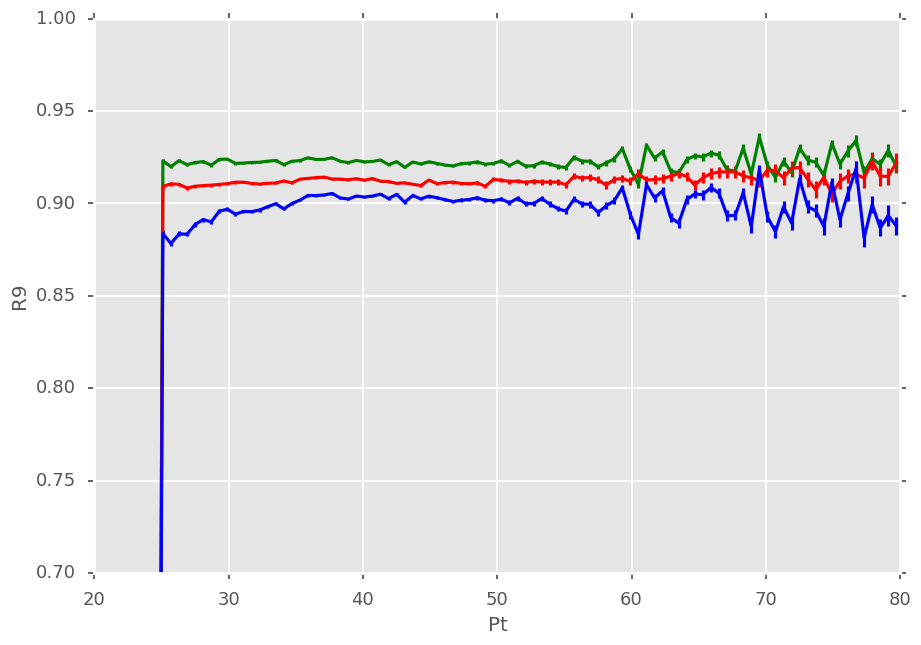

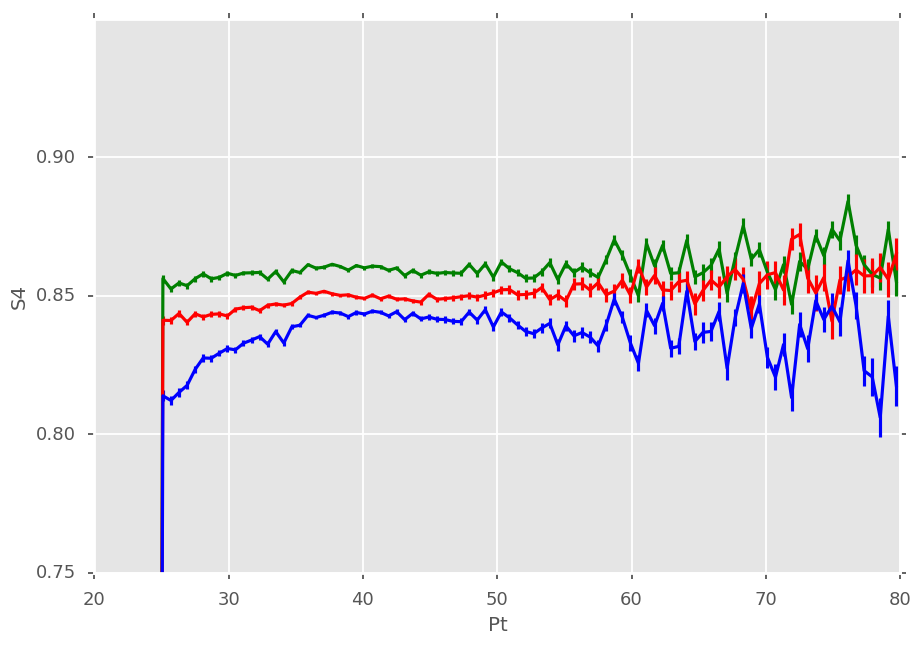

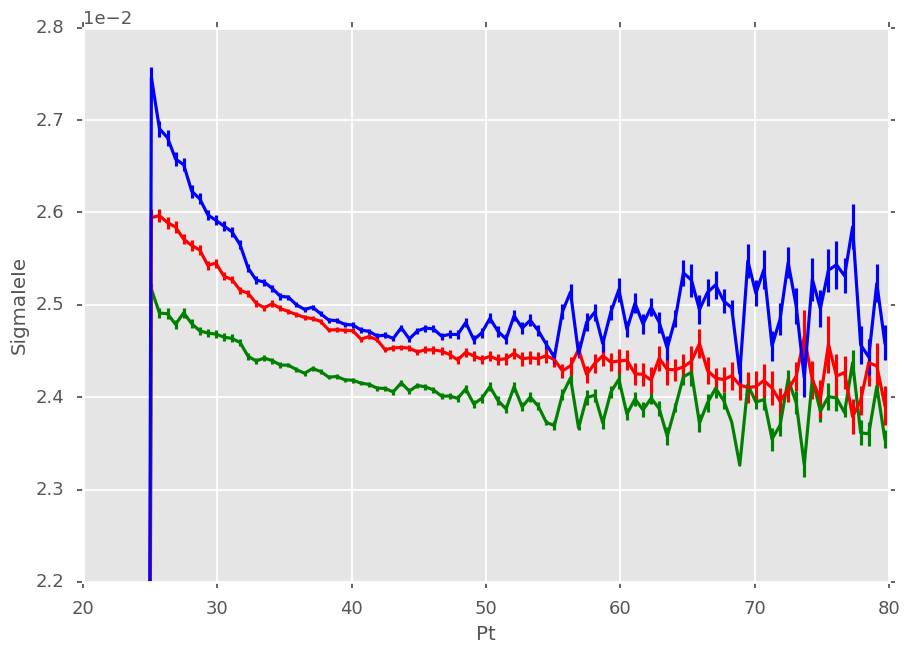

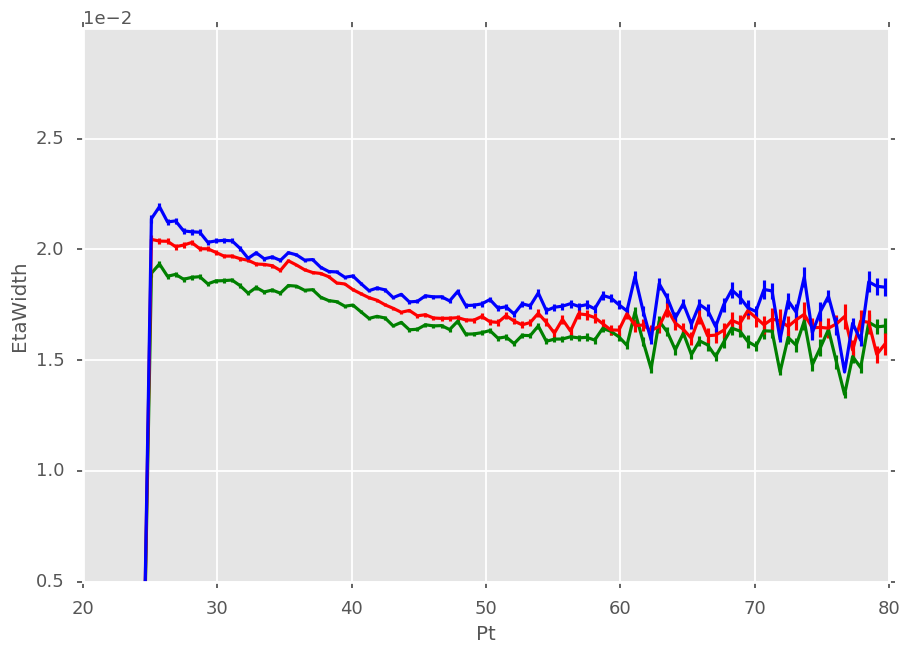

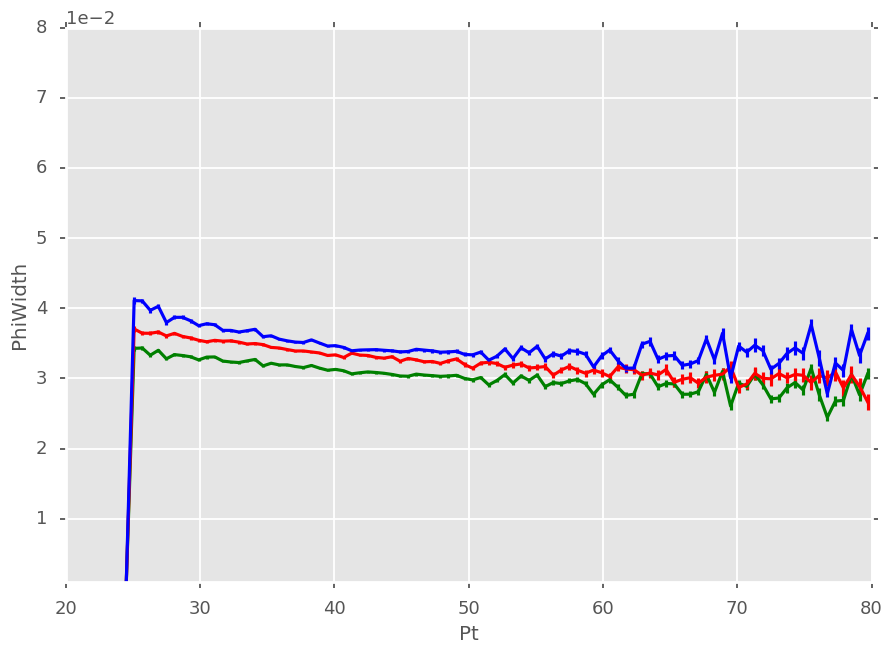

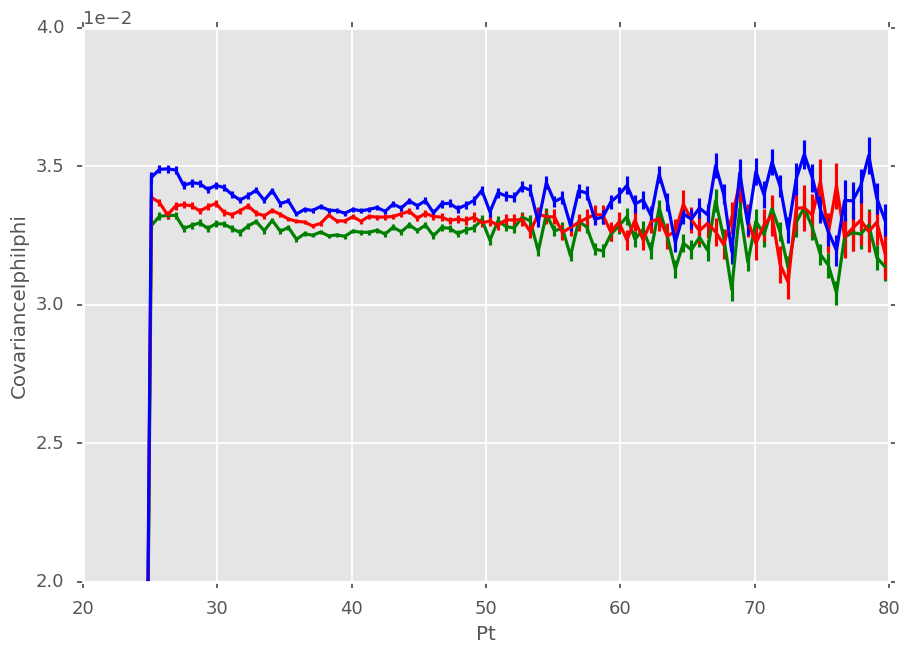

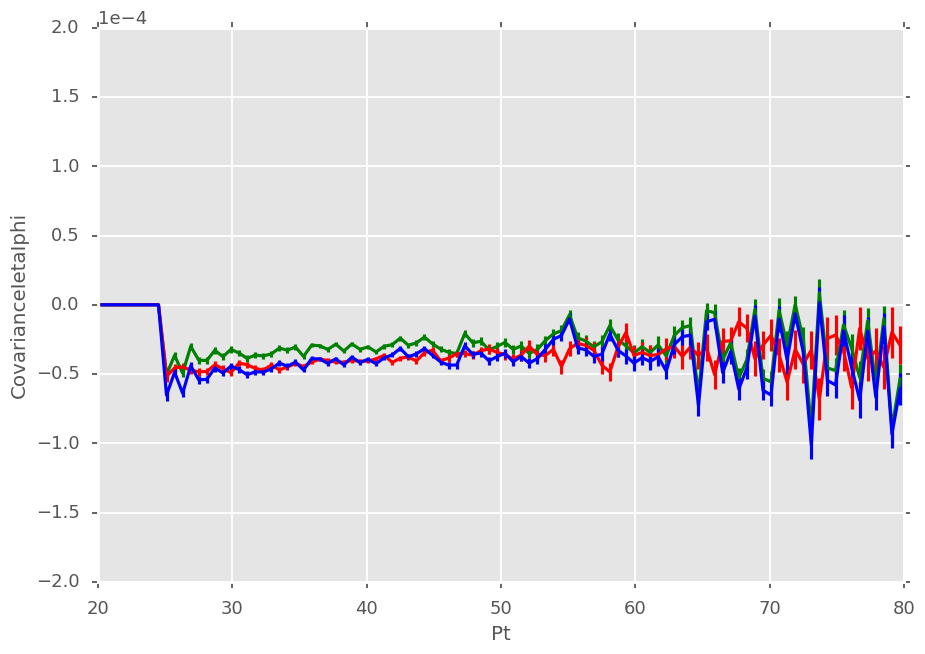

In [33]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEE
dfd=dfEE
sec= "EE"
name0="AllPeriods_Profiles_"+sec
section= "section3"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Profiles '+sec+"}")
f.close()

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.01
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in ["Pt"]:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        name= name0+yvar+"vs"+xvar
        fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        plot.exportToPdf(name,section)